<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Pandas_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas Tutorial 13. Crosstab**

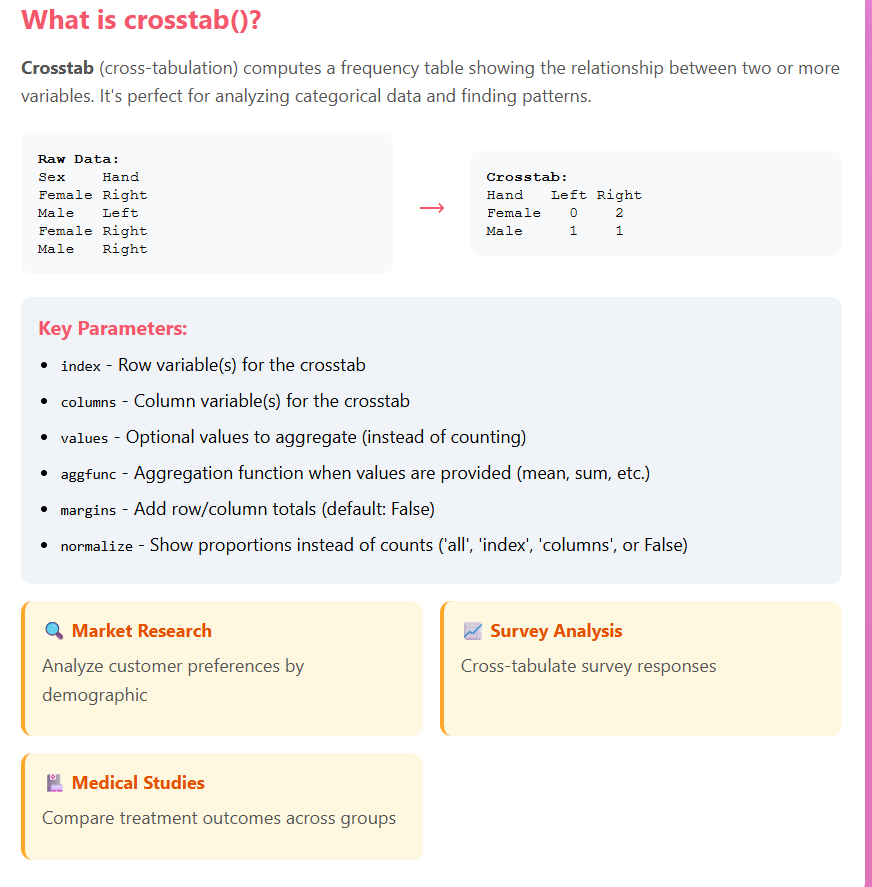

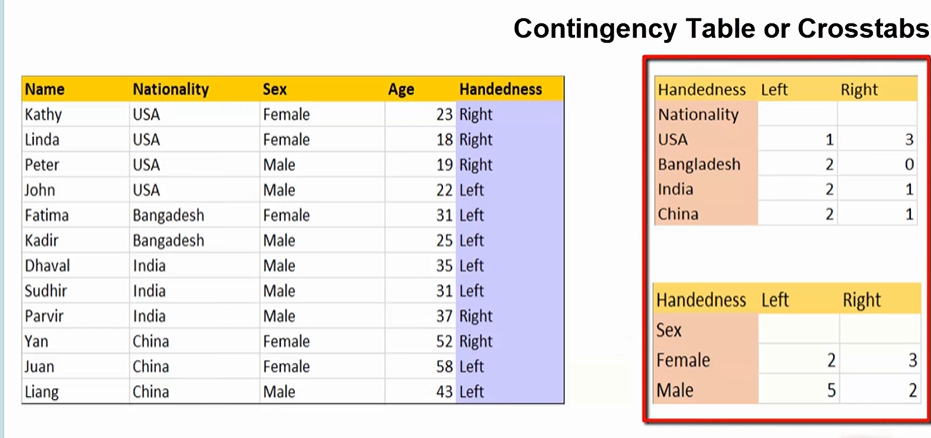

In [27]:

import pandas as pd
df = pd.read_excel("survey.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [2]:
pd.crosstab(df.Nationality,df.Handedness) #row,column

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [3]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


### Margins


In [9]:
pd.crosstab(df.Sex,df.Handedness,margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


###  Multi Index Column and Rows

In [10]:
pd.crosstab(df.Sex,[df.Handedness,df.Nationality],margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

can achieve the same results by using pivot_table

In [22]:
import numpy as np
s=pd.pivot_table(df,index='Sex',columns=['Handedness','Nationality'],aggfunc='count')
s
d=s.replace(np.nan,0)
d

Age                                        Name              \
Handedness       Left                  Right                 Left               
Nationality Bangadesh China India  USA China India  USA Bangadesh China India   
Sex                                                                             
Female            1.0   1.0   0.0  0.0   1.0   0.0  2.0       1.0   1.0   0.0   
Male              1.0   1.0   2.0  1.0   0.0   1.0  1.0       1.0   1.0   2.0   

                                   
Handedness       Right             
Nationality  USA China India  USA  
Sex                                
Female       0.0   1.0   0.0  2.0  
Male         1.0   0.0   1.0  1.0

In [23]:
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [24]:
pd.crosstab([df.Nationality,df.Sex],df.Handedness,margins=True)

Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

In [28]:
pd.crosstab(df.Sex,df.Handedness,margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


### Index gives us row wise percentage

In [31]:
pd.crosstab(df.Sex,df['Handedness'],normalize='index') #give us the percentage

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


### column-wise percentage

In [32]:
pd.crosstab(df.Sex,df['Handedness'],normalize='columns') #give us the percentage

Handedness,Left,Right
Sex,,
Female,0.285714,0.6
Male,0.714286,0.4


### normalize='all' → overall percentage

In [33]:
pd.crosstab(df['Sex'], df['Handedness'], normalize='all')


Handedness,Left,Right
Sex,,
Female,0.166667,0.250000
Male,0.416667,0.166667


In [35]:
pd.crosstab(df.Sex,df.Handedness,normalize=True) #same as all

Handedness,Left,Right
Sex,,
Female,0.166667,0.250000
Male,0.416667,0.166667


#### values lets you aggregate a specific column instead of counting rows.

In [36]:
pd.crosstab(df.Sex,df.Handedness,values=df.Age,aggfunc='mean')

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0





---



---


---

# Exercise

Create a basic crosstab showing the count of people by Nationality and Handedness.

In [4]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Kathy', 'Linda', 'Peter', 'John', 'Fatima'],
    'Nationality': ['USA', 'USA', 'USA', 'USA', 'Bangladesh'],
    'Handedness': ['Right', 'Right', 'Right', 'Left', 'Left']
})
df

,Name,Nationality,Handedness
0,Kathy,USA,Right
1,Linda,USA,Right
2,Peter,USA,Right
3,John,USA,Left
4,Fatima,Bangladesh,Left


In [5]:
pd.crosstab(df.Nationality,df.Handedness)

Handedness,Left,Right
Nationality,,
Bangladesh,1,0
USA,1,3


Create a crosstab with margins to show row and column totals.

In [6]:
import pandas as pd

df = pd.DataFrame({
    'Sex': ['Female', 'Female', 'Male', 'Male', 'Female', 'Male'],
    'Handedness': ['Right', 'Right', 'Left', 'Left', 'Left', 'Right']
})
df

,Sex,Handedness
0,Female,Right
1,Female,Right
2,Male,Left
3,Male,Left
4,Female,Left
5,Male,Right


In [7]:
pd.crosstab(df.Sex,df.Handedness,margins=True)

Handedness,Left,Right,All
Sex,,,
Female,1,2,3
Male,2,1,3
All,3,3,6


Create a crosstab with MultiIndex columns by using multiple column variables.

In [25]:
import pandas as pd

df = pd.DataFrame({
    'Sex': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Nationality': ['USA', 'USA', 'China', 'China', 'India', 'India'],
    'Handedness': ['Right', 'Left', 'Right', 'Left', 'Left', 'Right']
})
df

,Sex,Nationality,Handedness
0,Female,USA,Right
1,Male,USA,Left
2,Female,China,Right
3,Male,China,Left
4,Female,India,Left
5,Male,India,Right


In [26]:
pd.crosstab(df.Sex,[df.Nationality,df.Handedness])

Nationality China       India        USA      
Handedness   Left Right  Left Right Left Right
Sex                                           
Female          0     1     1     0    0     1
Male            1     0     0     1    1     0

Use the normalize parameter to show proportions instead of counts. Normalize by row (index).

In [37]:
import pandas as pd

df = pd.DataFrame({
    'Sex': ['Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male'],
    'Handedness': ['Right', 'Right', 'Left', 'Left', 'Left', 'Left', 'Right']
})

df

,Sex,Handedness
0,Female,Right
1,Female,Right
2,Female,Left
3,Male,Left
4,Male,Left
5,Male,Left
6,Male,Right


In [39]:
pd.crosstab(df.Sex,df.Handedness,normalize='index')

Handedness,Left,Right
Sex,,
Female,0.333333,0.666667
Male,0.750000,0.250000


Use values and aggfunc to calculate average age by Sex and Handedness instead of counting.

In [40]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Sex': ['Female', 'Female', 'Male', 'Male', 'Female', 'Male'],
    'Handedness': ['Right', 'Right', 'Left', 'Left', 'Left', 'Right'],
    'Age': [23, 18, 22, 25, 31, 19]
})
df

,Sex,Handedness,Age
0,Female,Right,23
1,Female,Right,18
2,Male,Left,22
3,Male,Left,25
4,Female,Left,31
5,Male,Right,19


In [42]:
pd.crosstab(df.Sex,df.Handedness,values=df.Age,aggfunc='mean')

Handedness,Left,Right
Sex,,
Female,31.0,20.5
Male,23.5,19.0


Create a complex crosstab with MultiIndex rows, margins, and normalized values. Show what percentage each cell represents of the total.

In [43]:
import pandas as pd

df = pd.DataFrame({
    'Nationality': ['USA', 'USA', 'China', 'China', 'India', 'India'],
    'Sex': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Handedness': ['Right', 'Left', 'Right', 'Left', 'Left', 'Right']
})
df

,Nationality,Sex,Handedness
0,USA,Female,Right
1,USA,Male,Left
2,China,Female,Right
3,China,Male,Left
4,India,Female,Left
5,India,Male,Right


In [45]:
pd.crosstab([df.Nationality,df.Sex],df.Handedness,margins=True,normalize='all')

Handedness              Left     Right       All
Nationality Sex                                 
China       Female  0.000000  0.166667  0.166667
            Male    0.166667  0.000000  0.166667
India       Female  0.166667  0.000000  0.166667
            Male    0.000000  0.166667  0.166667
USA         Female  0.000000  0.166667  0.166667
            Male    0.166667  0.000000  0.166667
All                 0.500000  0.500000  1.000000

Create a crosstab showing total sales by region and product category, then normalize by columns to see each region's share of each category.

In [50]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [1000, 500, 1500, 800, 1200, 600]
})
df

,Region,Category,Sales
0,North,Electronics,1000
1,North,Clothing,500
2,South,Electronics,1500
3,South,Clothing,800
4,East,Electronics,1200
5,East,Clothing,600


In [52]:
pd.crosstab(df.Region,df.Category,values=df.Sales,aggfunc=np.sum,normalize='columns')

/tmp/ipython-input-2489719821.py:1: FutureWarning: The provided callable <function sum at 0x7c5e76d427a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(df.Region,df.Category,values=df.Sales,aggfunc=np.sum,normalize='columns')


Category,Clothing,Electronics
Region,,
East,0.315789,0.324324
North,0.263158,0.270270
South,0.421053,0.405405
